In [3]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [15]:
dataset = pd.read_csv('Load Profile & DSM.csv')

In [16]:
dataset

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
0,Time Slot,01/04/2022,NaN,NaN,02/04/2022,NaN,NaN,03/04/2022,NaN,NaN,...,NaN,05/03/2023,NaN,NaN,06/03/2023,NaN,NaN,07/03/2023,NaN,NaN
1,NaN,Load MW,Scheduled,OD/ UD,Load MW,Scheduled,OD/ UD,Load MW,Scheduled,OD/ UD,...,OD/ UD,Load MW,Scheduled,OD/ UD,Load MW,Scheduled,OD/ UD,Load MW,Scheduled,OD/ UD
2,00:00,22.004,17.4315758106022,4.57242418939784,21.348,20.260128,1.087872,21.432,16.2246154899112,5.20738451008878,...,1.13838169558907,13.304,12.3304322684368,0.973567731563229,12.916,12.330528,0.585471999999999,13.296,11.3030841851261,1.99291581487393
3,00:15,22.04,20.260128,1.77987199999999,21.176,20.260128,0.915872,21.352,16.2246154899112,5.12738451008878,...,0.998381695589075,13.1,12.3304322684368,0.769567731563226,13.128,12.3304223639626,0.797577636037357,13.184,11.705310066482,1.478689933518
4,00:30,22.044,20.260128,1.783872,20.948,20.260128,0.687871999999999,21.176,20.260128,0.915871999999997,...,0.964949695589075,12.928,12.2412242684368,0.686775731563227,12.688,12.2412143639626,0.446785636037355,13.264,12.2412201249308,1.02277987506925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,22:45,22.704,20.260128,2.443872,22.656,20.260128,2.395872,22.764,20.6663845811396,2.09761541886038,...,0.708381695589075,15.02,14.4317752245596,0.588224775440361,14.796,14.431872,0.364127999999996,14.78,14.431872,0.348127999999999
94,23:00,22.364,20.260128,2.103872,22.552,18.2423717449556,4.30962825504439,22.432,20.6663845811396,1.76561541886038,...,0.856157695589076,14.476,13.9559992245596,0.52000077544036,14.472,13.956096,0.515903999999999,14.136,13.9558253302679,0.180174669732089
95,23:15,22.152,20.260128,1.891872,22.252,18.2423717449556,4.00962825504439,22.172,20.854649826058,1.31735017394202,...,0.803933695589075,14.284,13.4802232245596,0.80377677544036,14.1,13.48032,0.619679999999999,13.776,13.4800493302679,0.295950669732088
96,23:30,21.772,24.026026256337,-2.25402625633702,22.032,23.0940153708764,-1.06201537087638,22.028,23.134608,-1.106608,...,1.039456,13.688,13.0044472245596,0.683552775440361,13.556,13.004544,0.551456,13.472,13.0042733302679,0.467726669732089


In [17]:
# Initialize an empty list to store extracted values
load = []
scheduled = []
ODUD = []
# Iterate over every third column (starting from the second column)
for col_idx1 in range(1, dataset.shape[1], 3):
    # Extract values from the current column, starting from the fourth row
    column_values1 = dataset.iloc[2:, col_idx1].values.tolist()
    # Append the extracted values to the list
    load.extend(column_values1)

load = np.array(load)

print("Shape of load:", load.shape)
print(load)

for col_idx2 in range(2, dataset.shape[1], 3):
    column_values2 = dataset.iloc[2:, col_idx2].values.tolist()
    scheduled.extend(column_values2)
scheduled = np.array(scheduled)

print("Shape of scheduled:",scheduled.shape)
print(scheduled)

for col_idx3 in range(3, dataset.shape[1], 3):
    column_values3 = dataset.iloc[2:, col_idx3].values.tolist()
    ODUD.extend(column_values3)
ODUD = np.array(ODUD)

print("Shape of ODUD:",ODUD.shape)
print(ODUD)

Shape of load: (32736,)
['22.004' '22.04' '22.044' ... '13.776' '13.472' '13.264']
Shape of scheduled: (32736,)
['17.4315758106022' '20.260128' '20.260128' ... '13.4800493302679'
 '13.0042733302679' '12.5284973302679']
Shape of ODUD: (32736,)
['4.57242418939784' '1.77987199999999' '1.783872' ... '0.295950669732088'
 '0.467726669732089' '0.735502669732085']


In [18]:
load

array(['22.004', '22.04', '22.044', ..., '13.776', '13.472', '13.264'],
      dtype='<U16')

In [19]:
data_numeric = pd.to_numeric(load, errors='coerce')
load=np.array(load, dtype=float)
data_numeric = pd.to_numeric(scheduled, errors='coerce')
scheduled=np.array(scheduled, dtype=float)
data_numeric = pd.to_numeric(ODUD, errors='coerce')
ODUD=np.array(ODUD, dtype=float)
# Check the data type after conversion
print(load.dtype)
print(scheduled)
load

float64
[17.43157581 20.260128   20.260128   ... 13.48004933 13.00427333
 12.52849733]


array([22.004, 22.04 , 22.044, ..., 13.776, 13.472, 13.264])

In [20]:
load[0:96].max()

30.26

In [21]:

df = pd.DataFrame({'Load': load, 'Scheduled': scheduled, 'OD/UD': ODUD})
df.shape

(32736, 3)

In [22]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)
#print(len(missing_values))

Missing Values:
Load         0
Scheduled    0
OD/UD        0
dtype: int64


In [23]:
import pandas as pd

# Your original DataFrame (df) with Load, Scheduled, and OD/UD columns
# Assuming df is already defined

# Define the start and end dates
start_date = '2022-04-01 00:00:00'
end_date = '2023-03-31 00:00:00'

# Create a DatetimeIndex with 15-minute frequency
date_range = pd.date_range(start=start_date, end=end_date, freq='15T')

# Create a DataFrame with the dates
df_dates = pd.DataFrame({'timestamp': date_range})

# Change the format of the timestamp to day-month-2023
df_dates['timestamp'] = df_dates['timestamp'].dt.strftime('%d-%m-%Y %H:%M:%S')

# Insert the timestamp column at the beginning of the DataFrame
df.insert(0, 'timestamp', df_dates['timestamp'])

# Display the updated DataFrame
print(df)


                 timestamp    Load  Scheduled     OD/UD
0      01-04-2022 00:00:00  22.004  17.431576  4.572424
1      01-04-2022 00:15:00  22.040  20.260128  1.779872
2      01-04-2022 00:30:00  22.044  20.260128  1.783872
3      01-04-2022 00:45:00  21.736  20.260128  1.475872
4      01-04-2022 01:00:00  21.568  22.420199 -0.852199
...                    ...     ...        ...       ...
32731  07-03-2023 22:45:00  14.780  14.431872  0.348128
32732  07-03-2023 23:00:00  14.136  13.955825  0.180175
32733  07-03-2023 23:15:00  13.776  13.480049  0.295951
32734  07-03-2023 23:30:00  13.472  13.004273  0.467727
32735  07-03-2023 23:45:00  13.264  12.528497  0.735503

[32736 rows x 4 columns]


In [24]:
df.to_csv('data_extraction.csv', index=False)

In [25]:
# from google.colab import files

# output_csv_path = 'arhf.csv'

# files.download(output_csv_path)


In [26]:

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M:%S')

weekday_dummies = pd.get_dummies(df['timestamp'].dt.dayofweek, prefix='weekday')

weekday_dummies.columns = ['weekday_' + str((i + 1) % 7) for i in range(7)]

df = pd.concat([df, weekday_dummies], axis=1)
#df.drop(columns=['timestamp'], inplace=True)

print(df)


                timestamp    Load  Scheduled     OD/UD  weekday_1  weekday_2  \
0     2022-04-01 00:00:00  22.004  17.431576  4.572424          0          0   
1     2022-04-01 00:15:00  22.040  20.260128  1.779872          0          0   
2     2022-04-01 00:30:00  22.044  20.260128  1.783872          0          0   
3     2022-04-01 00:45:00  21.736  20.260128  1.475872          0          0   
4     2022-04-01 01:00:00  21.568  22.420199 -0.852199          0          0   
...                   ...     ...        ...       ...        ...        ...   
32731 2023-03-07 22:45:00  14.780  14.431872  0.348128          0          1   
32732 2023-03-07 23:00:00  14.136  13.955825  0.180175          0          1   
32733 2023-03-07 23:15:00  13.776  13.480049  0.295951          0          1   
32734 2023-03-07 23:30:00  13.472  13.004273  0.467727          0          1   
32735 2023-03-07 23:45:00  13.264  12.528497  0.735503          0          1   

       weekday_3  weekday_4  weekday_5 

In [27]:
df.head()

,timestamp,Load,Scheduled,OD/UD,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_0
0,2022-04-01 00:00:00,22.004,17.431576,4.572424,0,0,0,0,1,0,0
1,2022-04-01 00:15:00,22.040,20.260128,1.779872,0,0,0,0,1,0,0
2,2022-04-01 00:30:00,22.044,20.260128,1.783872,0,0,0,0,1,0,0
3,2022-04-01 00:45:00,21.736,20.260128,1.475872,0,0,0,0,1,0,0
4,2022-04-01 01:00:00,21.568,22.420199,-0.852199,0,0,0,0,1,0,0


In [28]:
df

,timestamp,Load,Scheduled,OD/UD,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_0
0,2022-04-01 00:00:00,22.004,17.431576,4.572424,0,0,0,0,1,0,0
1,2022-04-01 00:15:00,22.040,20.260128,1.779872,0,0,0,0,1,0,0
2,2022-04-01 00:30:00,22.044,20.260128,1.783872,0,0,0,0,1,0,0
3,2022-04-01 00:45:00,21.736,20.260128,1.475872,0,0,0,0,1,0,0
4,2022-04-01 01:00:00,21.568,22.420199,-0.852199,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32731,2023-03-07 22:45:00,14.780,14.431872,0.348128,0,1,0,0,0,0,0
32732,2023-03-07 23:00:00,14.136,13.955825,0.180175,0,1,0,0,0,0,0
32733,2023-03-07 23:15:00,13.776,13.480049,0.295951,0,1,0,0,0,0,0
32734,2023-03-07 23:30:00,13.472,13.004273,0.467727,0,1,0,0,0,0,0


In [29]:

lag96 = np.zeros([len(load),])
lag96[96:len(load)]=load[0:len(load)-96]
print(lag96)
print(lag96.shape)

lag192 = np.zeros([len(load),])
lag192[96*2:len(load)]=load[0:len(load)-96*2]
print(lag192)
print(lag192.shape)

lag672 = np.zeros([len(load),])
lag672[96*7:len(load)]=load[0:len(load)-96*7]
print(lag672)
print(lag672.shape)

[ 0.     0.     0.    ... 14.1   13.556 13.676]
(32736,)
[ 0.     0.     0.    ... 14.284 13.688 13.364]
(32736,)
[ 0.     0.     0.    ... 13.656 13.096 13.224]
(32736,)


In [30]:
df['Lag96'] = lag96
df['Lag192'] = lag192
df['Lag672'] = lag672

In [31]:
df

,timestamp,Load,Scheduled,OD/UD,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_0,Lag96,Lag192,Lag672
0,2022-04-01 00:00:00,22.004,17.431576,4.572424,0,0,0,0,1,0,0,0.000,0.000,0.000
1,2022-04-01 00:15:00,22.040,20.260128,1.779872,0,0,0,0,1,0,0,0.000,0.000,0.000
2,2022-04-01 00:30:00,22.044,20.260128,1.783872,0,0,0,0,1,0,0,0.000,0.000,0.000
3,2022-04-01 00:45:00,21.736,20.260128,1.475872,0,0,0,0,1,0,0,0.000,0.000,0.000
4,2022-04-01 01:00:00,21.568,22.420199,-0.852199,0,0,0,0,1,0,0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32731,2023-03-07 22:45:00,14.780,14.431872,0.348128,0,1,0,0,0,0,0,14.796,15.020,14.748
32732,2023-03-07 23:00:00,14.136,13.955825,0.180175,0,1,0,0,0,0,0,14.472,14.476,14.032
32733,2023-03-07 23:15:00,13.776,13.480049,0.295951,0,1,0,0,0,0,0,14.100,14.284,13.656
32734,2023-03-07 23:30:00,13.472,13.004273,0.467727,0,1,0,0,0,0,0,13.556,13.688,13.096


In [32]:
#df.to_csv('Predictive_matrix.csv', index=False)


In [33]:
time=df.iloc[:,0].values

In [34]:
n = len(time) - 960

time_some = time[:n]
time_remaining = time[n:]

print("time_some shape:", time_some.shape)
print("time_remaining shape:", time_remaining.shape)


time_some shape: (31776,)
time_remaining shape: (960,)


In [35]:
X = df.iloc[:, 4:].values
y = df.iloc[:,1].values

In [36]:
z = df.iloc[:,2].values

In [37]:

n = len(z) - 960

z_some = z[:n]
z_remaining = z[n:]

print("z_some shape:", z_some.shape)
print("z_remaining shape:", z_remaining.shape)


z_some shape: (31776,)
z_remaining shape: (960,)


In [38]:
z_some

array([17.43157581, 20.260128  , 20.260128  , ..., 13.440672  ,
       13.440672  , 12.964896  ])

In [39]:
# Get the names of columns for X
X_columns = df.columns[4:]

# Get the name of the column for y
y_column = df.columns[1]

print("Columns for X:", X_columns)
print("Column for y:", y_column)


Columns for X: Index(['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_0', 'Lag96', 'Lag192', 'Lag672'],
      dtype='object')
Column for y: Load


In [40]:
X

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  1.   ,  0.   , ..., 14.1  , 14.284, 13.656],
       [ 0.   ,  1.   ,  0.   , ..., 13.556, 13.688, 13.096],
       [ 0.   ,  1.   ,  0.   , ..., 13.676, 13.364, 13.224]])

Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split

num_last_values = 960
total_samples = len(X)

test_indices = range(total_samples - num_last_values, total_samples)

# Split the data into train and test sets using the defined test indices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=len(test_indices), random_state=0, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31776, 10)
X_test shape: (960, 10)
y_train shape: (31776,)
y_test shape: (960,)


In [42]:

print("y_test:", list(y_test))

y_test: [12.98, 12.74, 12.56, 12.384, 12.316, 12.356, 12.432, 12.368, 12.388, 12.336, 12.396, 12.388, 12.504, 12.48, 12.672, 12.72, 12.952, 13.24, 13.512, 13.956, 15.004, 15.884, 16.588, 17.056, 18.5, 19.156, 18.804, 20.4, 21.812, 22.652, 23.52, 24.016, 24.116, 24.448, 24.68, 24.036, 23.92, 23.82, 23.308, 22.884, 22.552, 21.84, 21.544, 20.988, 20.572, 19.424, 19.948, 19.784, 18.848, 18.136, 17.336, 17.284, 16.352, 16.416, 15.508, 14.952, 14.556, 13.308, 13.276, 12.672, 12.792, 12.468, 12.952, 12.904, 14.008, 14.484, 15.032, 15.944, 16.668, 17.1, 17.824, 18.24, 18.952, 19.556, 20.232, 20.796, 21.016, 21.088, 21.108, 20.92, 20.472, 20.172, 20.044, 19.708, 18.96, 18.436, 18.016, 17.22, 16.564, 16.08, 15.196, 14.668, 14.292, 13.972, 13.412, 13.492, 12.824, 12.32, 12.508, 12.428, 12.06, 12.464, 12.3, 12.288, 12.36, 12.332, 12.584, 12.3, 12.312, 12.44, 12.76, 12.54, 12.884, 13.608, 14.108, 14.832, 16.716, 18.3, 20.0, 21.68, 23.56, 25.82, 27.136, 28.608, 29.432, 29.78, 29.928, 29.04, 27.692, 

In [46]:
m = len(time) - 960

load_train = load[:m]
load_test = load[m:]

print("Load_train shape:",load_train.shape)
print("Load_test shape:", load_test.shape)


Load_train shape: (31776,)
Load_test shape: (960,)


In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [50]:
X_train.shape

(31776, 10)

In [121]:
from tensorflow.keras.layers import BatchNormalization, Dropout

# Define the LSTM model with optimizations
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

# Compile the model with a lower learning rate and use early stopping
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# # Implement early stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model with early stopping
# model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Train the model with early stopping
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
993/993 [==============================] - 15s 12ms/step - loss: 146.8801 - mae: 9.3887 - val_loss: 121.8911 - val_mae: 10.1550
Epoch 2/20
993/993 [==============================] - 10s 10ms/step - loss: 38.8703 - mae: 4.5790 - val_loss: 3.1555 - val_mae: 1.4956
Epoch 3/20
993/993 [==============================] - 10s 10ms/step - loss: 17.4590 - mae: 3.1513 - val_loss: 1.4128 - val_mae: 0.9604
Epoch 4/20
993/993 [==============================] - 11s 11ms/step - loss: 15.4374 - mae: 2.9811 - val_loss: 1.2316 - val_mae: 0.9006
Epoch 5/20
993/993 [==============================] - 10s 11ms/step - loss: 14.5192 - mae: 2.8679 - val_loss: 1.2536 - val_mae: 0.9242
Epoch 6/20
993/993 [==============================] - 11s 11ms/step - loss: 13.8306 - mae: 2.7959 - val_loss: 1.9763 - val_mae: 1.1580
Epoch 7/20
993/993 [==============================] - 11s 11ms/step - loss: 13.7659 - mae: 2.7897 - val_loss: 1.8162 - val_mae: 1.1109
Epoch 8/20
993/993 [==============================]

In [122]:
  # Assuming your model is already trained and you have test data X_test

# Make predictions on the test data
y_pred = model.predict(X_test)

# The predictions will be probabilities since you're using a sigmoid activation in the output layer.
# If you want binary predictions, you can round the probabilities to 0 or 1.
binary_predictions = (y_pred > 0.5).astype('int')

# Optionally, you can evaluate the performance of your model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


30/30 [==============================] - 0s 4ms/step - loss: 1.0347 - mae: 0.7813
Test Loss: 1.0347139835357666
Test Accuracy: 0.781340479850769


In [123]:
y_pred.shape

(960, 1)

In [124]:
y_test.shape

(960,)

In [125]:
y_pred=y_pred.reshape(-1,) #reshape it into a 1d array

In [126]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


     Actual  Predicted
0    12.980  13.360380
1    12.740  13.336976
2    12.560  13.321394
3    12.384  13.311325
4    12.316  13.302925
..      ...        ...
955  14.780  14.505477
956  14.136  14.053495
957  13.776  13.865871
958  13.472  13.673897
959  13.264  13.669328

[960 rows x 2 columns]


In [127]:
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(y_pred)

result_df = pd.concat([df1, df2], axis=1)


In [128]:

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[13.36 12.98]
 [13.34 12.74]
 [13.32 12.56]
 ...
 [13.87 13.78]
 [13.67 13.47]
 [13.67 13.26]]


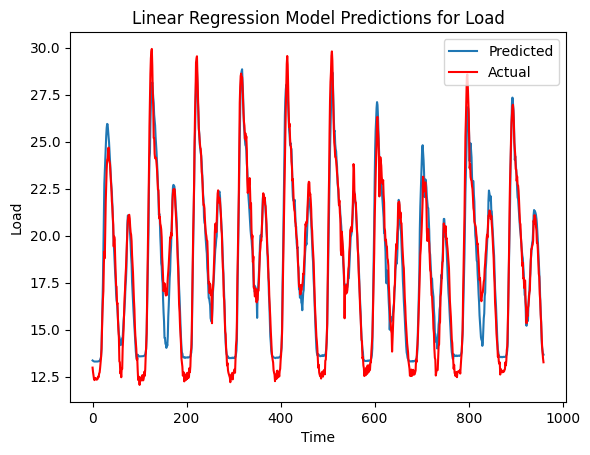

In [129]:
from sklearn.metrics import mean_squared_error
# Plot original data and predictions
# plt.plot(load, label='Original Load')
plt.plot(y_pred, label="Predicted" )
plt.plot(y_test,color='red',label="Actual")
# plt.plot(np.arange(len(load), len(load)+n_steps), predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Linear Regression Model Predictions for Load')
plt.legend()
plt.show()

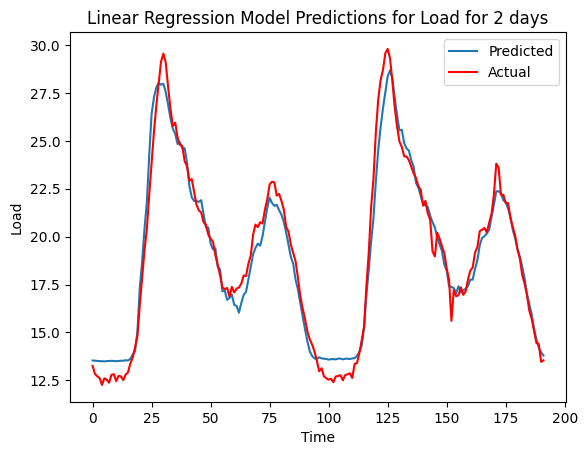

In [130]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the start and end indices for the portion of data to plot
start_index = 96*4
end_index = 96*6


plt.plot(y_pred[start_index:end_index], label="Predicted")
plt.plot(y_test[start_index:end_index], color='red', label="Actual")

plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Linear Regression Model Predictions for Load for 2 days')
plt.legend()
plt.show()


In [132]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.034713939339017
R-squared: 0.9462546300483378


In [95]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.97980687655002
R-squared: 0.9491066264217884


In [119]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.9967619602737972
R-squared: 0.9482259412269239


In [131]:
def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_pred - y_test) / y_test)) * 100


mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)



Mean Absolute Percentage Error (MAPE): 4.4242848918312365


In [83]:
def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_pred - y_test) / y_test)) * 100


mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 3.9066831915914304


In [ ]:
# Get the slope (coefficients) and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Form the equation of the line
equation_parts = [f"{coefficients[i]:.2f}x{i+1}" for i in range(len(coefficients))]
equation = " + ".join(equation_parts) + f" + {intercept:.2f}"
print("Equation of the line:", equation)


Coefficients: [ 3.09  0.48  0.22 -0.24  0.21 -2.15 -1.61  0.67  0.07  0.17]
Intercept: 2.4249046069297684
Equation of the line: 3.09x1 + 0.48x2 + 0.22x3 + -0.24x4 + 0.21x5 + -2.15x6 + -1.61x7 + 0.67x8 + 0.07x9 + 0.17x10 + 2.42


In [ ]:
coefficients = model.coef_
intercept =model.intercept_

# Display coefficients
for i in range(len(coefficients)):
    print(f"Coefficient for x{i+1}: {coefficients[i]}")

print("Intercept:", intercept)

Coefficient for x1: 3.0877769441042013
Coefficient for x2: 0.47850989033114977
Coefficient for x3: 0.22127850768428522
Coefficient for x4: -0.24483314647882945
Coefficient for x5: 0.2109607079183613
Coefficient for x6: -2.1460409474190425
Coefficient for x7: -1.6076519561401175
Coefficient for x8: 0.6737109789225125
Coefficient for x9: 0.07164873380824927
Coefficient for x10: 0.17475859276408914
Intercept: 2.4249046069297684


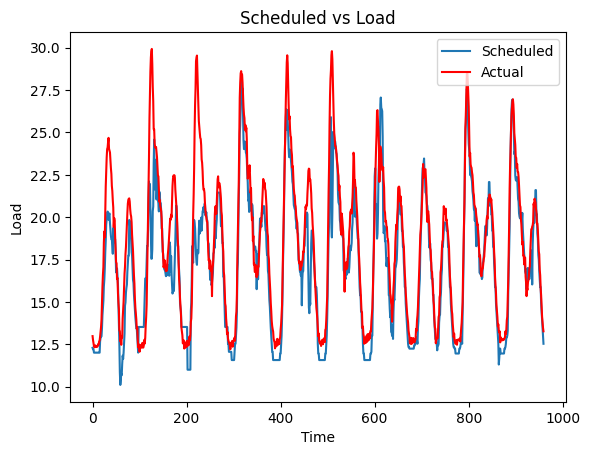

In [ ]:
from sklearn.metrics import mean_squared_error
# Plot original data and predictions
# plt.plot(load, label='Original Load')
plt.plot(z_remaining, label="Scheduled" )
plt.plot(y_test,color='red',label="Actual")
# plt.plot(np.arange(len(load), len(load)+n_steps), predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Scheduled vs Load')
plt.legend()
plt.show()

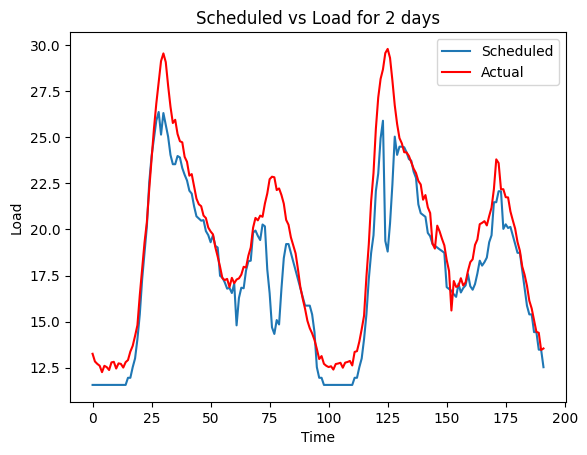

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


start_index = 96*4
end_index = 96*6

# Plot selected portion of original data and predictions
plt.plot(z_remaining[start_index:end_index], label="Scheduled")
plt.plot(y_test[start_index:end_index], color='red', label="Actual")

plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Scheduled vs Load for 2 days')
plt.legend()
plt.show()


In [ ]:
def mean_absolute_percentage_error(y_test, z_remaining ):
    return np.mean(np.abs((z_remaining - y_test) / y_test)) * 100

# Assuming y_true and y_pred are the true and predicted values, respectively
mape = mean_absolute_percentage_error(y_test, z_remaining )
print("Mean Absolute Percentage Error (MAPE) for load vs scheduled:", mape)


Mean Absolute Percentage Error (MAPE) for load vs scheduled: 7.07521754905779


In [ ]:

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, z_remaining)
r2 = r2_score(y_test,z_remaining)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 4.775791910131548
R-squared: 0.7519346234127833


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=18, activation='relu'))
ann.add(tf.keras.layers.Dense(units=18, activation='relu'))
ann.add(tf.keras.layers.Dense(units=18, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'RMSProp', loss = 'mean_squared_error',metrics=['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 10)




Epoch 1/10
993/993 [==============================] - 3s 3ms/step - loss: 23.4016 - accuracy: 0.0000e+00
Epoch 2/10
993/993 [==============================] - 2s 2ms/step - loss: 8.6876 - accuracy: 0.0000e+00
Epoch 3/10
993/993 [==============================] - 2s 2ms/step - loss: 7.9978 - accuracy: 0.0000e+00
Epoch 4/10
993/993 [==============================] - 2s 2ms/step - loss: 7.8748 - accuracy: 0.0000e+00
Epoch 5/10
993/993 [==============================] - 2s 2ms/step - loss: 7.7165 - accuracy: 0.0000e+00
Epoch 6/10
993/993 [==============================] - 2s 2ms/step - loss: 7.6586 - accuracy: 0.0000e+00
Epoch 7/10
993/993 [==============================] - 2s 2ms/step - loss: 7.5951 - accuracy: 0.0000e+00
Epoch 8/10
993/993 [==============================] - 2s 3ms/step - loss: 7.5507 - accuracy: 0.0000e+00
Epoch 9/10
993/993 [==============================] - 2s 2ms/step - loss: 7.4816 - accuracy: 0.0000e+00
Epoch 10/10
993/993 [==============================] - 2s 2ms/s

In [ ]:
loss, accuracy = ann.evaluate(X, y)
print("Loss:", loss)
print("Accuracy:", accuracy)



1023/1023 [==============================] - 2s 2ms/step - loss: 7.5002 - accuracy: 0.0000e+00
Loss: 7.500234603881836
Accuracy: 0.0


In [ ]:
y_pred = ann.predict(X_test)
#np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

30/30 [==============================] - 0s 1ms/step
[[12.89 12.98]
 [12.75 12.74]
 [12.58 12.56]
 ...
 [14.98 13.78]
 [14.45 13.47]
 [14.5  13.26]]


In [ ]:

df3 = pd.DataFrame(y_pred)
df4 = pd.DataFrame(z_remaining)

result_df1 = pd.concat([result_df,df3, df4], axis=1)


In [ ]:

df5 = pd.DataFrame(time_remaining)

result_df2 = pd.concat([result_df1, df5], axis=1)


In [ ]:
new_column_names = ['Actual Load', 'Prediction_LR', 'Prediction_ANN', 'Scheduled', 'Timestamps']

result_df2.columns = new_column_names

print(result_df2)

     Actual Load  Prediction_LR  Prediction_ANN  Scheduled          Timestamps
0         12.980      12.836981       12.888970  12.290880 2023-02-26 00:00:00
1         12.740      12.681203       12.747630  12.201672 2023-02-26 00:15:00
2         12.560      12.526221       12.579043  12.201672 2023-02-26 00:30:00
3         12.384      12.408659       12.447242  12.003432 2023-02-26 00:45:00
4         12.316      12.295613       12.320140  12.003432 2023-02-26 01:00:00
..           ...            ...             ...        ...                 ...
955       14.780      16.525146       15.627235  14.431872 2023-03-07 22:45:00
956       14.136      16.142759       15.319880  13.955825 2023-03-07 23:00:00
957       13.776      15.812673       14.983261  13.480049 2023-03-07 23:15:00
958       13.472      15.305607       14.448834  13.004273 2023-03-07 23:30:00
959       13.264      15.385607       14.499936  12.528497 2023-03-07 23:45:00

[960 rows x 5 columns]


In [ ]:
result_df2

,Actual Load,Prediction_LR,Prediction_ANN,Scheduled,Timestamps
0,12.980,12.836981,12.888970,12.290880,2023-02-26 00:00:00
1,12.740,12.681203,12.747630,12.201672,2023-02-26 00:15:00
2,12.560,12.526221,12.579043,12.201672,2023-02-26 00:30:00
3,12.384,12.408659,12.447242,12.003432,2023-02-26 00:45:00
4,12.316,12.295613,12.320140,12.003432,2023-02-26 01:00:00
...,...,...,...,...,...
955,14.780,16.525146,15.627235,14.431872,2023-03-07 22:45:00
956,14.136,16.142759,15.319880,13.955825,2023-03-07 23:00:00
957,13.776,15.812673,14.983261,13.480049,2023-03-07 23:15:00
958,13.472,15.305607,14.448834,13.004273,2023-03-07 23:30:00


In [ ]:
result_df2.to_csv('combined_data.csv', index=False)

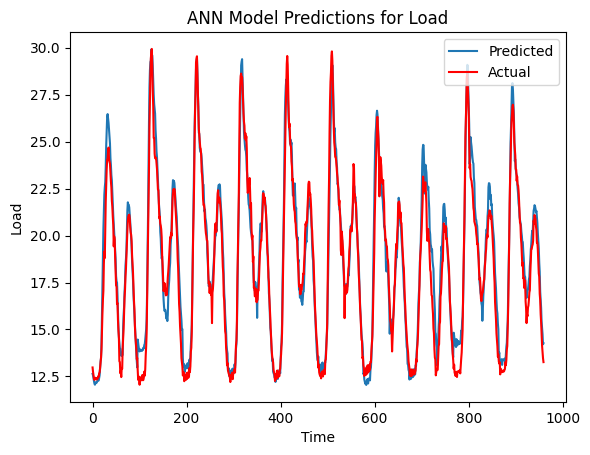

In [ ]:
from sklearn.metrics import mean_squared_error
# Plot original data and predictions
# plt.plot(load, label='Original Load')
plt.plot(y_pred, label="Predicted" )
plt.plot(y_test,color='red',label="Actual")
# plt.plot(np.arange(len(load), len(load)+n_steps), predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('ANN Model Predictions for Load')
plt.legend()
plt.show()


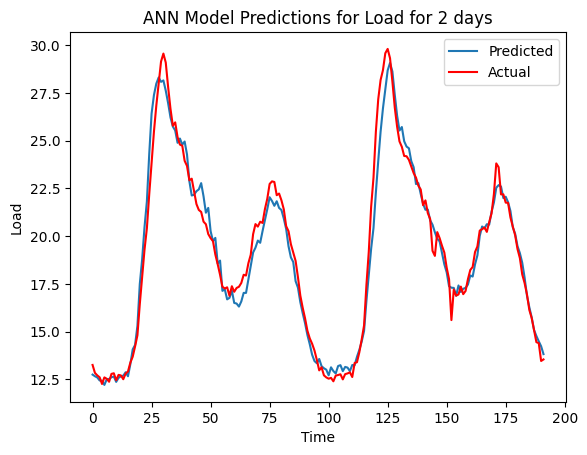

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the start and end indices for the portion of data to plot
start_index = 96*4
end_index = 96*6

# Plot selected portion of original data and predictions
plt.plot(y_pred[start_index:end_index], label="Predicted")
plt.plot(y_test[start_index:end_index], color='red', label="Actual")

plt.xlabel('Time')
plt.ylabel('Load')
plt.title('ANN Model Predictions for Load for 2 days')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.9036038001052056
R-squared: 0.9530647856571783


In [ ]:
import numpy as np

def calculate_mape(y_true, y_pred):    

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    ape = np.abs((y_true - y_pred) / y_true)

    ape[np.isnan(ape)] = 0

    mape = np.mean(ape) * 100

    return mape

mape = calculate_mape(y_test, y_pred)         # MAPE : Mean Absolute Percentage Error
print("MAPE:", mape)


MAPE: 29.612692343201257


In [ ]:
import numpy as np

def calculate_mae(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    absolute_errors = np.abs(y_true - y_pred)

    mae = np.mean(absolute_errors)

    return mae

mae = calculate_mae(y_test, y_pred)
print("MAE:", mae)


MAE: 5.041872856618015


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Root Mean Squared Error (RMSE): 1.2331451080419278
Mean Absolute Percentage Error (MAPE): 29.612692343201257


In [ ]:

value = 13.676

indices = np.where(load == value)

print("Indices of value", value, ":", indices[0])

Indices of value 13.676 : [21130 21417 22289 32639]


In [ ]:
load[-193]

13.364

In [ ]:


from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")


In [ ]:
check_stationarity(load)

ADF Statistic: -12.745338
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


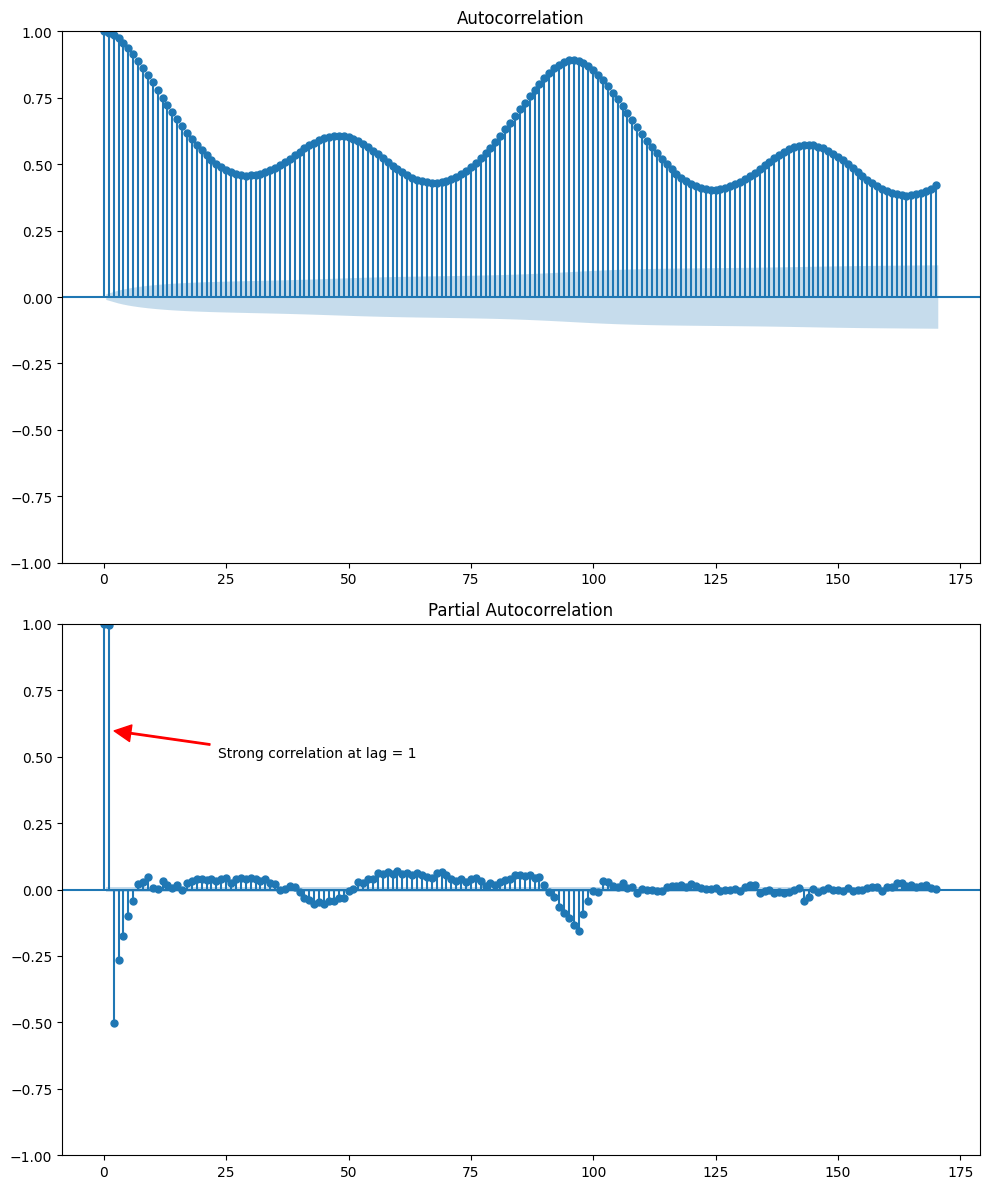

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
width = 10
height = 6
lag_acf = 170
lag_pacf = 170
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))

# Plot ACF
plot_acf(load, lags=lag_acf, ax=ax[0])

# Plot PACF
plot_pacf(load, lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction',
               arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

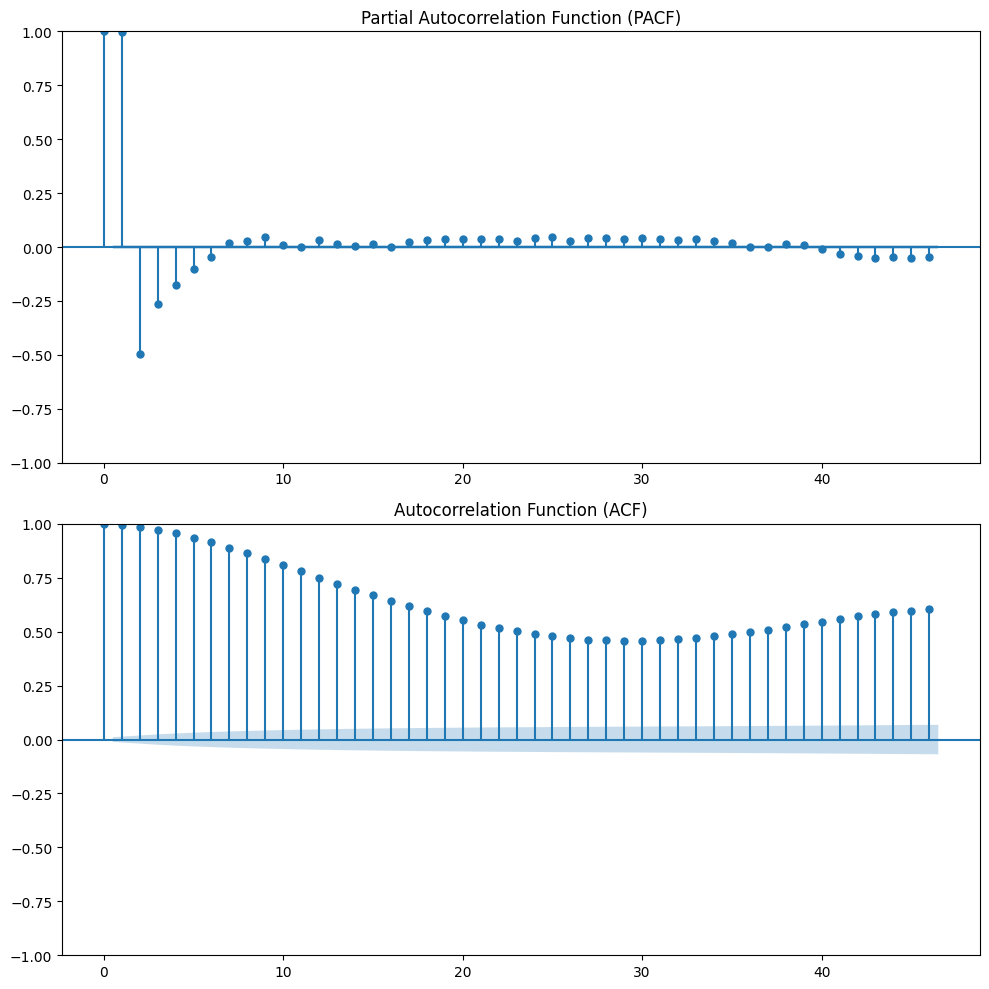

In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot PACF on the first subplot
plot_pacf(load, ax=ax1)
ax1.set_title('Partial Autocorrelation Function (PACF)')

# Plot ACF on the second subplot
plot_acf(load, ax=ax2)
ax2.set_title('Autocorrelation Function (ACF)')

plt.tight_layout()
plt.show()

In [ ]:
load

array([22.  , 22.04, 22.04, ..., 13.78, 13.47, 13.26])

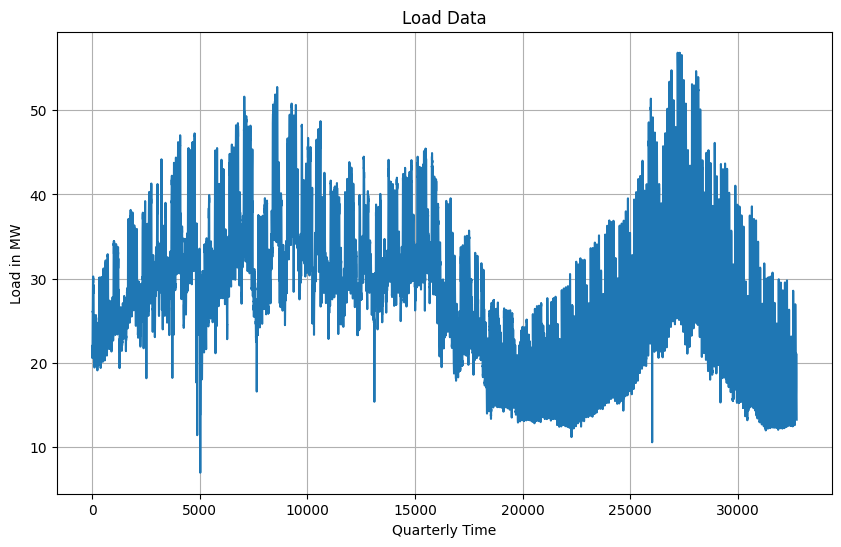

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(load)
plt.title('Load Data')
plt.xlabel('Quarterly Time')
plt.ylabel('Load in MW')
plt.grid(True)
plt.show()

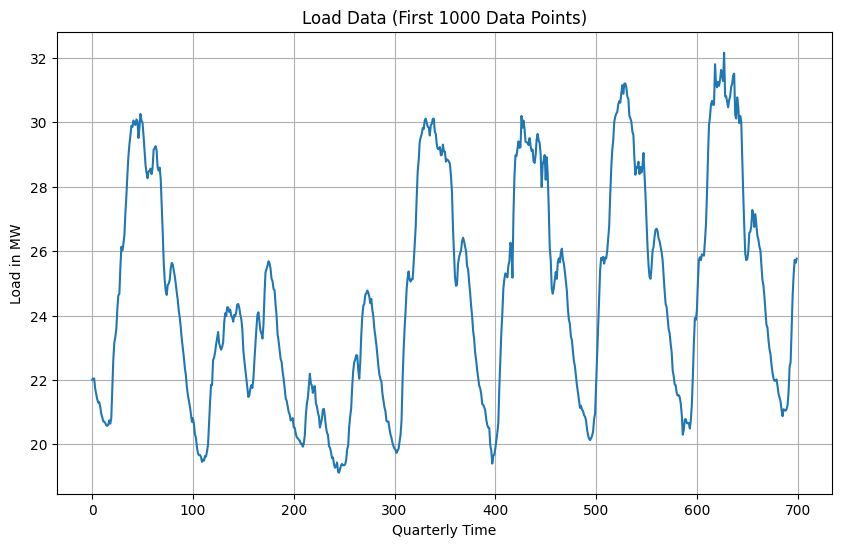

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(load[:700])  # Plotting the first 1000 data points
plt.title('Load Data (First 1000 Data Points)')
plt.xlabel('Quarterly Time')
plt.ylabel('Load in MW')
plt.grid(True)
plt.show()

In [ ]:

# Assuming 'load' is your NumPy array containing time series data
dates = pd.date_range(start='2022-01-01', periods=len(load), freq='15min')
load_df = pd.DataFrame({'Value': load}, index=dates)

# Convert index to DatetimeIndex
load_df.index = pd.to_datetime(load_df.index)
load_df

,Value
2022-01-01 00:00:00,22.004
2022-01-01 00:15:00,21.348
2022-01-01 00:30:00,21.432
2022-01-01 00:45:00,21.576
2022-01-01 01:00:00,21.824
...,...
2022-12-07 22:45:00,13.544
2022-12-07 23:00:00,13.776
2022-12-07 23:15:00,13.364
2022-12-07 23:30:00,13.676


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

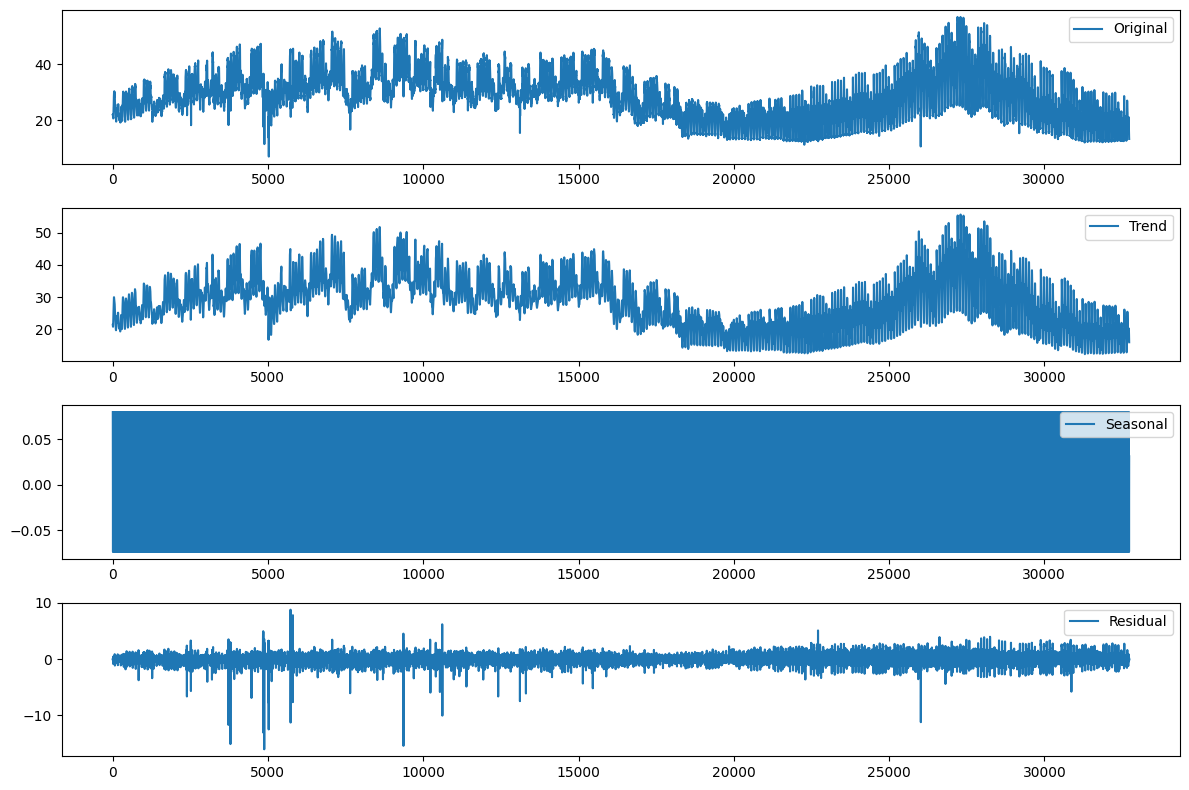

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'load' is your time series data
# Perform seasonal decomposition
decomposition = seasonal_decompose(load, model='additive', period=12)  # Adjust period as needed

# Plot the original time series and its components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(load, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

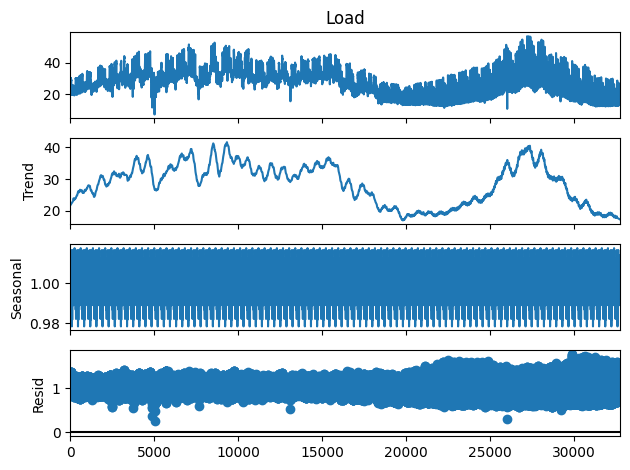

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition
plt.figure(figsize=(12, 8))
decomp_mul = seasonal_decompose(df['Load'], model='multiplicative', extrapolate_trend='freq', period=365)
decomp_mul.plot()
plt.show()

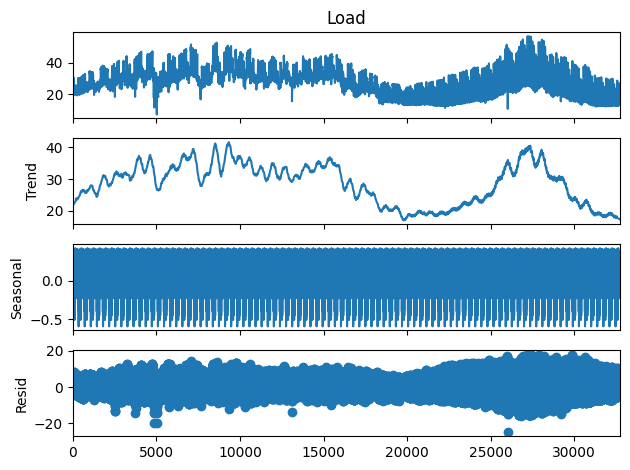

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition
decomp_mul = seasonal_decompose(df['Load'], model='additive', extrapolate_trend='freq', period=365)
decomp_mul.plot()
plt.show()

Split dataset load into Train and Test:
Testing for last 7 days

In [ ]:
train=load[:len(load)-100]
test=load[len(load)-100:]

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR model
model = AutoReg(train, lags=8).fit() # Example: AR model with lag order 2
print(model.summary())



                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                32729
Model:                     AutoReg(8)   Log Likelihood              -81580.633
Method:               Conditional MLE   S.D. of innovations              2.928
Date:                Sat, 03 Feb 2024   AIC                         163181.266
Time:                        17:08:26   BIC                         163265.224
Sample:                             8   HQIC                        163208.094
                                32729                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9916      0.063     15.845      0.000       0.869       1.114
y.L1           0.6865      0.005    134.166      0.000       0.676       0.697
y.L2           0.0668      0.006     11.918      0.0

In [ ]:

pred=model.predict(start=len(train),end=len(load)-1,dynamic=False)

In [ ]:
comparison = pd.DataFrame({'Actual': test, 'Predicted': pred})
print(comparison)


   Actual  Predicted
0  13.392  13.891142
1  13.520  14.096879
2  13.544  14.417000
3  13.776  14.684918
4  13.364  14.967818
5  13.676  14.785939
6  13.264  15.029622


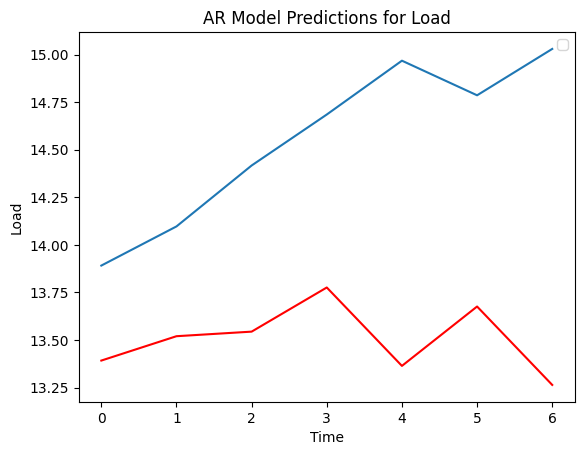

Root Mean Squared Error (RMSE): 1.139662276600081


In [ ]:
from sklearn.metrics import mean_squared_error
# Plot original data and predictions
# plt.plot(load, label='Original Load')
plt.plot(pred)
plt.plot(test,color='red')
# plt.plot(np.arange(len(load), len(load)+n_steps), predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('AR Model Predictions for Load')
plt.legend()
plt.show()

# Calculate RMSE (optional)
# test_data = np.random.randn(n_steps)  # Example: test data
rmse = np.sqrt(mean_squared_error(test, pred))
print('Root Mean Squared Error (RMSE):', rmse)

In [ ]:
pred_future=model.predict(start=len(load)+1,end=len(load)+7,dynamic=False)
print(pred_future)



[15.68615528 15.949055   16.22568344 16.45305134 16.40745313 16.63322662
 16.94351328]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit a Moving Average (MA) model with order 1, discarding initial observations
model = ARIMA(train, order=(0, 0, 5)).fit()  # ARIMA(p=0, d=0, q=1) for MA(1)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                32729
Model:                 ARIMA(0, 0, 5)   Log Likelihood              -89757.457
Date:                Sat, 03 Feb 2024   AIC                         179528.915
Time:                        17:09:43   BIC                         179587.687
Sample:                             0   HQIC                        179547.695
                              - 32729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5414      0.131    217.462      0.000      28.284      28.799
ma.L1          1.0219      0.004    271.547      0.000       1.015       1.029
ma.L2          1.0560      0.005    216.775      0.0

In [ ]:
predMA=model.predict(start=len(train),end=len(load)-1,dynamic=False)

   Actual  Predicted
0  13.392  16.197106
1  13.520  19.522339
2  13.544  22.818326
3  13.776  25.500380
4  13.364  27.632132
5  13.676  28.541383
6  13.264  28.541383


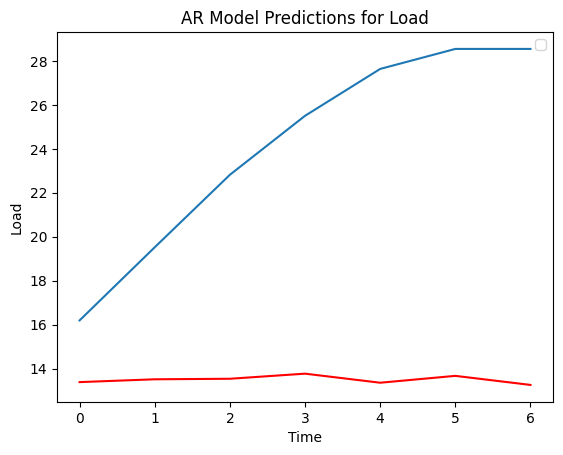

Root Mean Squared Error (RMSE): 11.497382039794264


In [ ]:
comparison = pd.DataFrame({'Actual': test, 'Predicted': predMA})
print(comparison)
from sklearn.metrics import mean_squared_error
# Plot original data and predictions
# plt.plot(load, label='Original Load')
plt.plot(predMA)
plt.plot(test,color='red')
# plt.plot(np.arange(len(load), len(load)+n_steps), predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('AR Model Predictions for Load')
plt.legend()
plt.show()

# Calculate RMSE (optional)
# test_data = np.random.randn(n_steps)  # Example: test data
rmse = np.sqrt(mean_squared_error(test, predMA))
print('Root Mean Squared Error (RMSE):', rmse)

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                32729
Model:                 ARIMA(0, 0, 5)   Log Likelihood              -89757.457
Date:                Sat, 03 Feb 2024   AIC                         179528.915
Time:                        15:37:56   BIC                         179587.687
Sample:                             0   HQIC                        179547.695
                              - 32729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5414      0.131    217.462      0.000      28.284      28.799
ma.L1          1.0219      0.004    271.547      0.000       1.015       1.029
ma.L2          1.0560      0.005    216.775      0.0

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model_arima = auto_arima(train, seasonal=False, trace=True)

# Print the summary of the best model
print(model_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=174002.760, Time=62.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=180677.870, Time=0.96 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=179654.396, Time=2.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=178782.245, Time=4.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=180675.871, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=175267.937, Time=20.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=175131.661, Time=14.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=173646.922, Time=46.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=174833.875, Time=22.37 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=168679.130, Time=91.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=174168.355, Time=21.26 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=166875.612, Time=53.05 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=171198.406, Time=23.07 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=165900.797, Time=111.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit a Moving Average (MA) model with order 1, discarding initial observations
modelARIMA = ARIMA(train, order=(5, 0, 5)).fit()  # ARIMA(p=0, d=0, q=1) for MA(1)
print(modelARIMA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                32636
Model:                 ARIMA(5, 0, 5)   Log Likelihood              -80803.370
Date:                Sat, 03 Feb 2024   AIC                         161630.741
Time:                        17:46:04   BIC                         161731.459
Sample:                             0   HQIC                        161662.928
                              - 32636                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5649     12.402      2.303      0.021       4.257      52.873
ar.L1          1.7803      0.002   1015.724      0.000       1.777       1.784
ar.L2         -2.2077      0.003   -863.767      0.0

In [ ]:
predARIMA=modelARIMA.predict(start=len(train),end=len(load)-1,dynamic=False)

    Actual  Predicted
0   15.088  14.789251
1   15.132  14.780077
2   15.552  14.644925
3   15.712  14.592006
4   15.752  14.857513
..     ...        ...
95  13.544  15.763019
96  13.776  15.859720
97  13.364  15.758531
98  13.676  15.710669
99  13.264  15.796787

[100 rows x 2 columns]


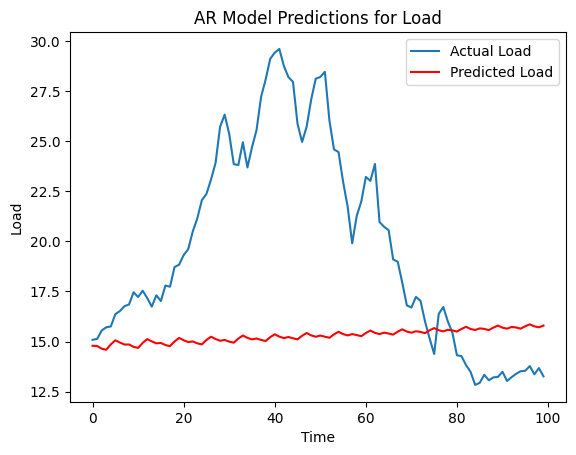

Root Mean Squared Error (RMSE): 6.793150745409109


In [ ]:
comparison = pd.DataFrame({'Actual': test, 'Predicted': predARIMA})
print(comparison)
from sklearn.metrics import mean_squared_error
# Plot original data and predictions
# plt.plot(load, label='Original Load')
plt.plot(test, label='Actual Load')  # Plot the actual load
plt.plot(predARIMA, color='red', label='Predicted Load')  # Plot the predicted load
# plt.plot(np.arange(len(load), len(load)+n_steps), predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('AR Model Predictions for Load')
plt.legend()
plt.show()

# Calculate RMSE (optional)
# test_data = np.random.randn(n_steps)  # Example: test data
rmse = np.sqrt(mean_squared_error(test, predARIMA))
print('Root Mean Squared Error (RMSE):', rmse)

In [ ]:
model_arima = auto_arima(train, seasonal=False,start_p=1, d=0, start_q=1,  # Lower values for p and q
                         max_p=5, max_q=5,              # Upper limit for p and q
                         information_criterion='aic',   # Prioritize faster model selection
                          trace=True)

# Print the summary of the best model
print(model_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=178317.020, Time=9.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=314078.956, Time=0.48 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=274587.627, Time=3.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=175169.295, Time=14.90 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=1.25 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=174710.191, Time=17.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.55 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=174413.067, Time=22.29 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=2.59 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=173749.098, Time=28.62 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=2.44 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=173202.425, Time=42.89 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=173227.507, Time=41.39 sec
 ARIMA(5,0,3)(0,0,0)[0]           

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit a Moving Average (MA) model with order 1, discarding initial observations
modelARIMA = ARIMA(train, order=(5, 0, 5)).fit()  # ARIMA(p=0, d=0, q=1) for MA(1)
print(modelARIMA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                32636
Model:                 ARIMA(5, 0, 5)   Log Likelihood              -80803.370
Date:                Sat, 03 Feb 2024   AIC                         161630.741
Time:                        18:11:54   BIC                         161731.459
Sample:                             0   HQIC                        161662.928
                              - 32636                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5649     12.402      2.303      0.021       4.257      52.873
ar.L1          1.7803      0.002   1015.724      0.000       1.777       1.784
ar.L2         -2.2077      0.003   -863.767      0.0

    Actual  Predicted
0   15.088  14.789251
1   15.132  14.780077
2   15.552  14.644925
3   15.712  14.592006
4   15.752  14.857513
..     ...        ...
95  13.544  15.763019
96  13.776  15.859720
97  13.364  15.758531
98  13.676  15.710669
99  13.264  15.796787

[100 rows x 2 columns]


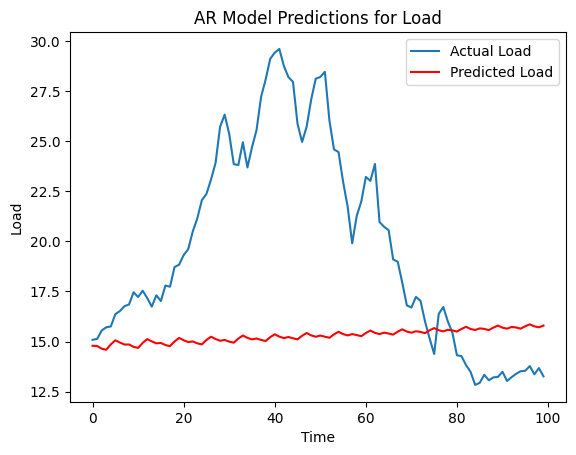

Root Mean Squared Error (RMSE): 6.793150745409109


In [ ]:
predARIMA=modelARIMA.predict(start=len(train),end=len(load)-1,dynamic=False)
comparison = pd.DataFrame({'Actual': test, 'Predicted': predARIMA})
print(comparison)
from sklearn.metrics import mean_squared_error
plt.plot(test, label='Actual Load')  # Plot the actual load
plt.plot(predARIMA, color='red', label='Predicted Load')  # Plot the predicted load
# plt.plot(np.arange(len(load), len(load)+n_steps), predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('AR Model Predictions for Load')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(test, predARIMA))
print('Root Mean Squared Error (RMSE):', rmse)